In [1]:
import python_inventory as pyinv

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/Duncan.csv")
df

,name,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90
5,minister,prof,21,84,87
6,professor,prof,64,93,93
7,dentist,prof,80,100,90
8,reporter,wc,67,87,52
9,engineer,prof,72,86,88


In [4]:
def name2id(name):
    if name == 'bc':
        return 1
    if name == 'wc':
        return 2
    else:
        return 3
    
df['profid'] = df['type'].apply(name2id)

In [5]:
income = df['income'].values
education = df['education'].values
prestige = df['prestige'].values
profid = df['profid'].values

In [6]:
import matplotlib.pyplot as plt

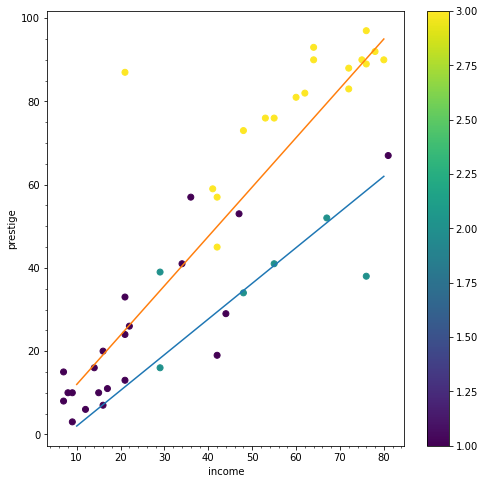

In [7]:
plt.figure(figsize=(8,8))
sc = plt.scatter(income, prestige, c=profid)
plt.xlabel('income')
plt.ylabel('prestige')
plt.plot([10,80], [2, 62])
plt.plot([10,80], [12, 95])
plt.minorticks_on()
plt.colorbar(sc)
plt.show()

In [8]:
import numpy as np

In [9]:
X = income
Xs = income.reshape(-1,1)
Y = prestige

In [10]:
mod1 = pyinv.LinearModel(1)
mod2 = pyinv.LinearModel(1)

modlayer = pyinv.FuncLayer([mod1, mod2])
modlayer.init_param()

In [11]:
loss_func = pyinv.SoftMinimalLoss(pyinv.ErrorLoss(pyinv.SoftAbs(0.001)))

In [12]:
risk = pyinv.Risk2(modlayer, loss_func)

In [13]:
gd = pyinv.GradientDescent(risk, h=0.01)

[-0.64635831  0.68543042] [0.03400811 1.25838283]


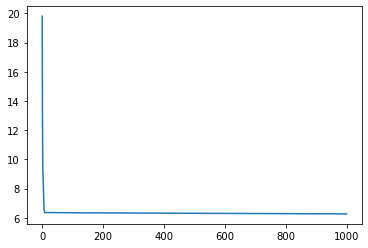

In [14]:
gd.fit(Xs, Y)

print(mod1.param, mod2.param)

plt.plot(gd.rvals)
plt.show()

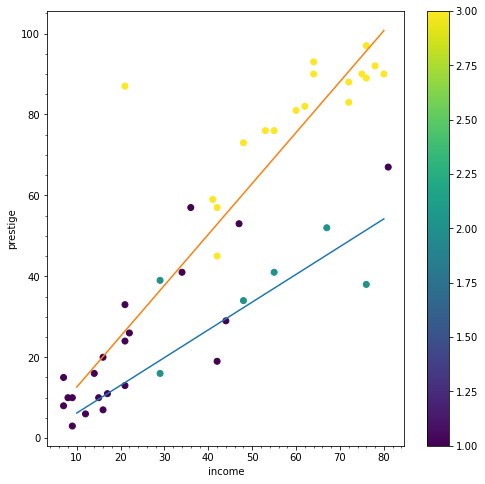

In [15]:
plt.figure(figsize=(8,8))
sc = plt.scatter(income, prestige, c=profid)
plt.xlabel('income')
plt.ylabel('prestige')
xrange = np.array([10,80], 'd')
xrange_s = xrange.reshape(-1,1)
plt.plot(xrange, mod1.evaluate_all(xrange_s))
plt.plot(xrange, mod2.evaluate_all(xrange_s))
plt.minorticks_on()
plt.colorbar(sc)
plt.show()

In [16]:
mod1_1 = pyinv.LinearModel(1)
mod1_2 = pyinv.LinearModel(1)

modlayer_1 = pyinv.FuncLayer([mod1_1, mod1_2])
modlayer_1.init_param()

In [17]:
agg_func = pyinv.WMMean(pyinv.SoftQuantileFunc(pyinv.SoftAbs(0.001), 0.95))

In [18]:
loss_func = pyinv.SoftMinimalLoss(pyinv.ErrorLoss(pyinv.SoftAbs(0.001)))

In [19]:
risk_1 = pyinv.Risk2(modlayer_1, loss_func, agg=agg_func)

In [20]:
gd_1 = pyinv.GradientDescent(risk_1, h=0.01)

[0.24239535 1.23639418] [-0.73519704  0.73084352]


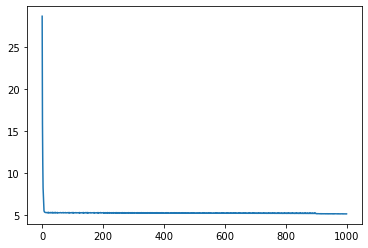

In [21]:
gd_1.fit(Xs, Y)

print(mod1_1.param, mod1_2.param)

plt.plot(gd_1.rvals)
plt.show()

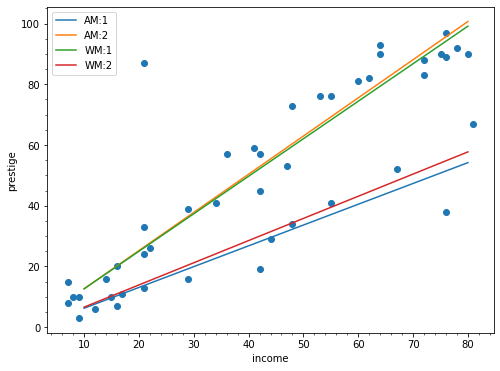

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(income, prestige)
plt.xlabel('income')
plt.ylabel('prestige')
plt.plot(xrange, mod1.evaluate_all(xrange_s), label='AM:1')
plt.plot(xrange, mod2.evaluate_all(xrange_s), label='AM:2')
plt.plot(xrange, mod1_1.evaluate_all(xrange_s), label='WM:1')
plt.plot(xrange, mod1_2.evaluate_all(xrange_s), label='WM:2')
plt.legend()
plt.minorticks_on()
plt.show()